In [37]:
# importing the necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# loading our data
pd.set_option('display.max_colwidth', None)
raw_data = pd.read_csv("C:/Users/Ahmad/Desktop/Python/TwitterProjects/nr_blackmarket_raw.csv", index_col=0)
raw_data.head()

,Date,Username,Tweet
0,2022-11-30 11:05:01+00:00,naira_rates,"Wed November, 11:05:01 AM \n\n💵 1 USD &gt;&gt;&gt;&gt;&gt; ₦755.717\n💷 1 GBP &gt;&gt;&gt;&gt;&gt; ₦919.712\n💶 1 EUR &gt;&gt;&gt;&gt;&gt; ₦795.260\n\n v1.0.6"
1,2022-11-29 11:05:01+00:00,naira_rates,"Tue November, 11:05:01 AM \n\n💵 1 USD &gt;&gt;&gt;&gt;&gt; ₦773.201\n💷 1 GBP &gt;&gt;&gt;&gt;&gt; ₦946.124\n💶 1 EUR &gt;&gt;&gt;&gt;&gt; ₦814.975\n\n v1.0.6"
2,2022-11-28 11:05:02+00:00,naira_rates,"Mon November, 11:05:02 AM \n\n💵 1 USD &gt;&gt;&gt;&gt;&gt; ₦773.201\n💷 1 GBP &gt;&gt;&gt;&gt;&gt; ₦948.180\n💶 1 EUR &gt;&gt;&gt;&gt;&gt; ₦816.395\n\n v1.0.6"
3,2022-11-27 11:05:01+00:00,naira_rates,"Sun November, 11:05:01 AM \n\n💵 1 USD &gt;&gt;&gt;&gt;&gt; ₦773.201\n💷 1 GBP &gt;&gt;&gt;&gt;&gt; ₦949.074\n💶 1 EUR &gt;&gt;&gt;&gt;&gt; ₦815.302\n\n v1.0.6"
4,2022-11-26 11:05:01+00:00,naira_rates,"Sat November, 11:05:01 AM \n\n💵 1 USD &gt;&gt;&gt;&gt;&gt; ₦773.201\n💷 1 GBP &gt;&gt;&gt;&gt;&gt; ₦949.074\n💶 1 EUR &gt;&gt;&gt;&gt;&gt; ₦815.302\n\n v1.0.6"


In [38]:
# converting to appropriate data types
raw_tweet = raw_data['Tweet'].astype('string')
date_in_dt = pd.to_datetime(raw_data['Date'])
date_in_dt = date_in_dt.dt.date
date_in_dt = pd.to_datetime(date_in_dt)
raw_data['Date'] = date_in_dt
raw_tweet.dtypes, date_in_dt.dtypes

(string[python], dtype('<M8[ns]'))

In [39]:
# cleaning up the tweets
dirty_tweet = raw_tweet.str.replace('&gt;', "").str.replace('₦', "")
dirty_tweet.head(1)

0    Wed November, 11:05:01 AM 

💵 1 USD  755.717
💷 1 GBP  919.712
💶 1 EUR  795.260

 v1.0.6
Name: Tweet, dtype: string

In [40]:
# using regex to extract USD rates
pattern = "(?:USD)  \d{3}.\d{3}"
com_pat = re.compile(pattern)
cleaned_tweet = dirty_tweet.apply(lambda x: com_pat.findall(x))
# [df1.str.match(pat)==True]
cleaned_tweet.head()

0    [USD  755.717]
1    [USD  773.201]
2    [USD  773.201]
3    [USD  773.201]
4    [USD  773.201]
Name: Tweet, dtype: object

In [41]:
# adding the extracted data as a column in our dataset
raw_data['Exchange Rate'] = cleaned_tweet.explode().str[3:].astype('float')
raw_data['Exchange Rate'].head()

0    755.717
1    773.201
2    773.201
3    773.201
4    773.201
Name: Exchange Rate, dtype: float64

In [42]:
# our new df
nr_dol = raw_data[['Date', 'Exchange Rate']]
nr_dol.dtypes

Date             datetime64[ns]
Exchange Rate           float64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

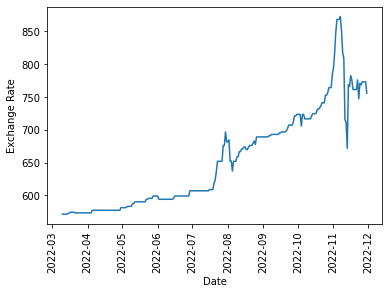

In [43]:
# plotting a chart of exchange rate
sns.lineplot(data=nr_dol, x='Date', y='Exchange Rate')
plt.xticks(rotation=90)
plt.show

In [44]:
# nr_dol.to_csv('blackmarket_rates2022.csv')